# Load Libraries/Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
pd.set_option("display.max_columns",100)
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

import joblib

import shap

## fixing random for lesson generation
SEED = 321
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [5]:
loaded_joblib = joblib.load('Data/best_models.joblib')
loaded_joblib.keys()

dict_keys(['X_train_df', 'X_train_rf', 'y_train', 'X_test_df', 'X_test_rf', 'y_test', 'preprocessor', 'preprocessor_rf', 'LinearRegression', 'RandomForest'])

In [6]:
X_train = loaded_joblib['X_train_rf']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test_rf']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor_rf']
rf_reg = loaded_joblib['RandomForest']

In [7]:
X_train

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
8269,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.220,0.064142,61.2510,1998.0
7604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.135,0.079294,111.2860,2009.0
2762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.150,0.028593,151.0708,2004.0
6464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.945,0.093009,127.8652,2004.0
4707,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,18.200,0.066285,247.2092,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.550,0.012216,162.7894,1985.0
8360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,11.500,0.014884,174.5080,1999.0
5929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.110,0.034945,161.1210,2002.0
4220,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.550,0.034800,157.5288,2007.0


In [9]:
print(f"Training R^2: {rf_reg.score(X_train,y_train):.3f}")
print(f"Test R^2: {rf_reg.score(X_test, y_test):.3f}")

Training R^2: 0.937
Test R^2: 0.561


# Apply SHAP

In [12]:
shap.initjs()

## X_shap, y_shap Variables

In [13]:
X_shap = shap.sample(X_train, nsamples=400, random_state=321)
X_shap

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4469,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.720,0.074669,76.3986,1987.0
4438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.110,0.034868,163.8210,2004.0
366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.050,0.078386,256.4646,2004.0
2219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.760,0.050131,128.3336,1999.0
6080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.590,0.176748,82.7908,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.670,0.150555,130.0626,1998.0
4680,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,14.300,0.034383,96.5726,1987.0
1288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,16.000,0.041029,142.6496,2002.0
3635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.550,0.113213,254.6040,1985.0


In [15]:
y_shap = y_train.loc[X_shap.index]
y_shap

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
215      131.1626
4680    2251.0698
1288    1834.9448
3635     759.0120
7936    4074.6960
Name: Item_Outlet_Sales, Length: 400, dtype: float64

## Model Explainer

In [16]:
explainer = shap.Explainer(rf_reg)
explainer

## SHAP Values

In [17]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(400, 42)

In [18]:
X_shap.shape

(400, 42)

In [20]:
shap_values[0]

.values =
array([ 2.62925611e+01, -4.41077744e+00,  1.73576829e+01,  2.44438574e-01,
       -5.34041423e+00, -1.31373576e+00,  1.92433680e-01,  1.50512605e-01,
       -2.69759780e-01,  1.22918235e+00,  2.51157840e+00,  9.88426092e-01,
       -8.24750222e-01, -3.26258054e-01, -2.43713368e+00, -1.00453320e+00,
       -3.65111346e-01,  1.82567471e-02, -5.56619857e+00, -5.08315634e+00,
        9.39845387e-01, -8.65573885e-02, -4.81926559e+01, -3.31343076e+00,
        2.55817358e+00,  4.33924711e-01, -3.43349706e+00,  4.33679971e+00,
       -1.86358183e+00,  6.97728761e+00, -4.10391038e+00, -3.63732155e+00,
       -1.67833124e+01, -2.76777399e+01,  2.07992339e+02,  1.96226771e+00,
        1.68467516e+00, -3.72855537e+01,  6.12817484e+01,  3.78132661e+01,
       -9.44948607e+02, -5.18594563e+01])

.base_values =
array([2154.71233664])

.data =
array([1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000

## Summary Bar Plot

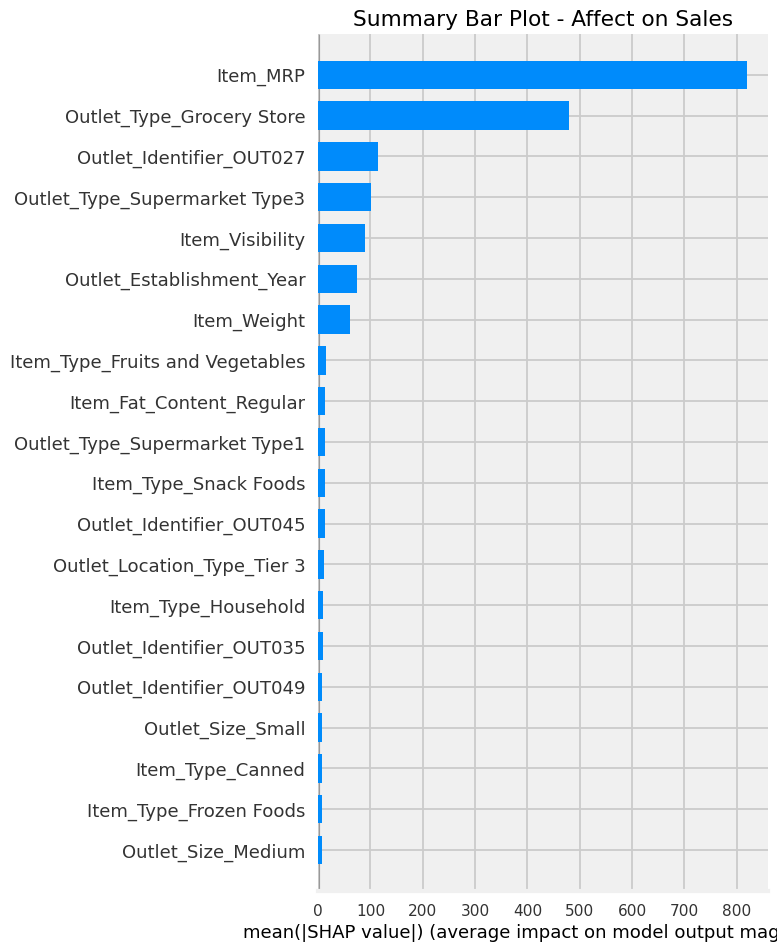

In [33]:
fig, ax = plt.subplots()

shap.summary_plot(shap_values,X_shap, show=False, plot_type='bar')

ax.set_title('Summary Bar Plot - Affect on Sales');

fig.savefig('Data/summary_plot_bar_rf_reg.png')

***
**Default Importances**

<img src = "Data/rf_default_importances.png" width=80% >

***
**Permutation Importances**

<img src = "Data/rf_perm_importances.png" width=80% >

### Summary Bar Plot Comparison

- Default and Permutation Importances have the same top 5 features


- SHAP Plot Summary differes in that:
    - 'Item_Visibility' is ranked lower (5th instead of 3rd)
    - 'Outlet_Type_Supermarket Type 3' takes the place of 'Item_Weight' (ranked 4th)
    - 'Outlet_Identifier_OUT027' is ranked higher (3rd instead of 5th)

## Summary Dot Plot

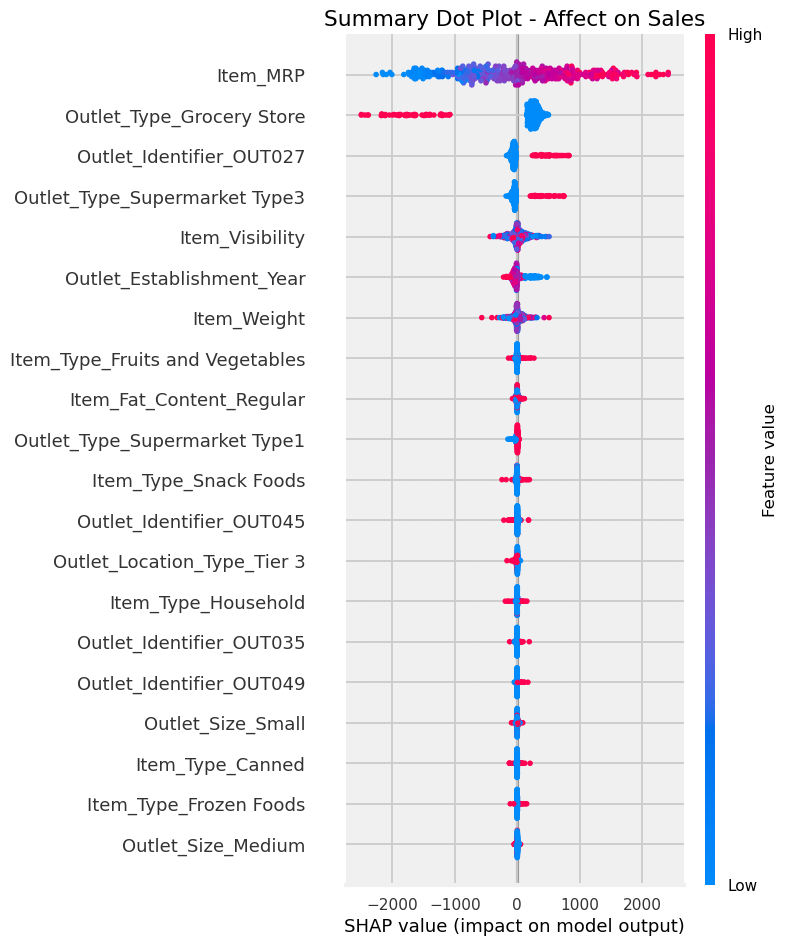

In [34]:
fig, ax = plt.subplots()

shap.summary_plot(shap_values,X_shap, show=False)

ax.set_title('Summary Dot Plot - Affect on Sales');

fig.savefig('Data/summary_plot_dot_rf_reg.png')

### Summary Dot Plot Comparison

**Interpret Top 3 Features**

- 'Item_MRP':
    - As the value of the item's MRP increases (gets redder), the target value ('Item_Outlet_Sales') increases as well (moves right)


- 'Outlet_Type_Grocery_Store' (true/false):
    - Being a Grocery Store (red/true) will decrease (move left) the target value ('Item_Outlet_Sales')
    - Not being a Grocery Store (blue/false) will increase (move right) the target value ('Item_Outlet_Sales')
    
    
- 'Outlet_Identifier_OUT027' (true/false):
    - Being Outlet OUT027 (red/true) will increase (move right) the target value ('Item_Outlet_Sales')
    - Not being a Outlet OUT027 (blue/false) will only marginally affect (keep center at 0 or slightly move left) the target value ('Item_Outlet_Sales')